In [20]:
# Setup: Add src directory to path
import sys
from pathlib import Path

# Add src directory to path to import math_research
notebook_dir = Path.cwd()

# Try multiple strategies to find src directory
src_dir = None

if (notebook_dir / "math_research").exists():
    src_dir = notebook_dir
elif (notebook_dir.parent / "math_research").exists():
    src_dir = notebook_dir.parent
elif (notebook_dir.parent.parent / "src" / "math_research").exists():
    src_dir = notebook_dir.parent.parent / "src"
else:
    current = notebook_dir
    for _ in range(5):
        potential_src = current / "src"
        if (potential_src / "math_research").exists():
            src_dir = potential_src
            break
        current = current.parent

if src_dir is None or not (Path(src_dir) / "math_research").exists():
    raise ImportError(
        f"Could not find 'src' directory containing math_research package.\n"
        f"Current directory: {notebook_dir}\n"
        f"Please ensure you're running from the project root or src/notebooks/ directory."
    )

src_path = str(Path(src_dir).resolve())
if src_path not in sys.path:
    sys.path.insert(0, src_path)

from math_research.sequences import CollatzSequence
from math_research.analysis import SequenceStatistics, SequenceVisualizer
import matplotlib.pyplot as plt
import numpy as np

print(f"✓ Successfully imported math_research from: {src_path}")


✓ Successfully imported math_research from: \\Desktop-q4hk28j\e\CursorProjects\Research\Mathematics\ARKHE\src


# Sequence Analysis

This notebook demonstrates statistical analysis and pattern detection for Collatz sequences.

**Author:** MoniGarr  
**Email:** monigarr@MoniGarr.com  
**Website:** MoniGarr.com


In [21]:
# Generate multiple Collatz sequences for analysis
sequences_data = []

# Generate sequences from various starting values
starting_values = [7, 15, 27, 31, 41, 127, 255, 511, 1023, 2047]

print("Generating Collatz sequences...")
for start in starting_values:
    seq = CollatzSequence(start=start)
    sequence = seq.generate()
    sequences_data.append({
        'start': start,
        'sequence': sequence,
        'length': len(sequence),
        'max_value': seq.get_max_value(),
    })
    print(f"  Start: {start:4d} -> Length: {len(sequence):3d} steps, Max: {seq.get_max_value()}")

print(f"\n✓ Generated {len(sequences_data)} sequences for analysis")


Generating Collatz sequences...
  Start:    7 -> Length:  17 steps, Max: 52
  Start:   15 -> Length:  18 steps, Max: 160
  Start:   27 -> Length: 112 steps, Max: 9232
  Start:   31 -> Length: 107 steps, Max: 9232
  Start:   41 -> Length: 110 steps, Max: 9232
  Start:  127 -> Length:  47 steps, Max: 4372
  Start:  255 -> Length:  48 steps, Max: 13120
  Start:  511 -> Length:  62 steps, Max: 39364
  Start: 1023 -> Length:  63 steps, Max: 118096
  Start: 2047 -> Length: 157 steps, Max: 1276936

✓ Generated 10 sequences for analysis


## Statistical Analysis


In [23]:
# Analyze each sequence with SequenceStatistics
print("Statistical Analysis of Collatz Sequences:\n")
print("=" * 80)

for data in sequences_data:
    stats = SequenceStatistics(data['sequence'])
    summary = stats.summary()
    
    # Compute odd/even statistics manually (not in summary)
    sequence = data['sequence']
    odd_count = sum(1 for x in sequence if x % 2 == 1)
    even_count = sum(1 for x in sequence if x % 2 == 0)
    odd_even_ratio = odd_count / even_count if even_count > 0 else float('inf')
    
    print(f"\nStarting value: {data['start']}")
    print(f"  Length: {summary.get('length', 'N/A')} steps")
    print(f"  Maximum value: {summary.get('max_value', 'N/A')}")
    mean_val = summary.get('mean')
    std_val = summary.get('std_dev')
    print(f"  Average: {mean_val:.2f}" if isinstance(mean_val, (int, float)) else f"  Average: {mean_val}")
    print(f"  Standard deviation: {std_val:.2f}" if isinstance(std_val, (int, float)) else f"  Standard deviation: {std_val}")
    print(f"  Total odd steps: {odd_count}")
    print(f"  Total even steps: {even_count}")
    print(f"  Odd/Even ratio: {odd_even_ratio:.4f}" if isinstance(odd_even_ratio, (int, float)) and odd_even_ratio != float('inf') else f"  Odd/Even ratio: {odd_even_ratio}")
    peak_pos = summary.get('peak_position')
    print(f"  Peak position: {peak_pos}" if peak_pos is not None else "  Peak position: N/A")


Statistical Analysis of Collatz Sequences:


Starting value: 7
  Length: 17 steps
  Maximum value: 52
  Average: 16.94
  Standard deviation: 13.79
  Total odd steps: 6
  Total even steps: 11
  Odd/Even ratio: 0.5455
  Peak position: 5

Starting value: 15
  Length: 18 steps
  Maximum value: 160
  Average: 38.56
  Standard deviation: 41.33
  Total odd steps: 6
  Total even steps: 12
  Odd/Even ratio: 0.5000
  Peak position: 7

Starting value: 27
  Length: 112 steps
  Maximum value: 9232
  Average: 905.71
  Standard deviation: 1484.57
  Total odd steps: 42
  Total even steps: 70
  Odd/Even ratio: 0.6000
  Peak position: 77

Starting value: 31
  Length: 107 steps
  Maximum value: 9232
  Average: 944.90
  Standard deviation: 1507.48
  Total odd steps: 40
  Total even steps: 67
  Odd/Even ratio: 0.5970
  Peak position: 72

Starting value: 41
  Length: 110 steps
  Maximum value: 9232
  Average: 921.19
  Standard deviation: 1493.52
  Total odd steps: 41
  Total even steps: 69
  Odd/Even ratio:

## Visualization


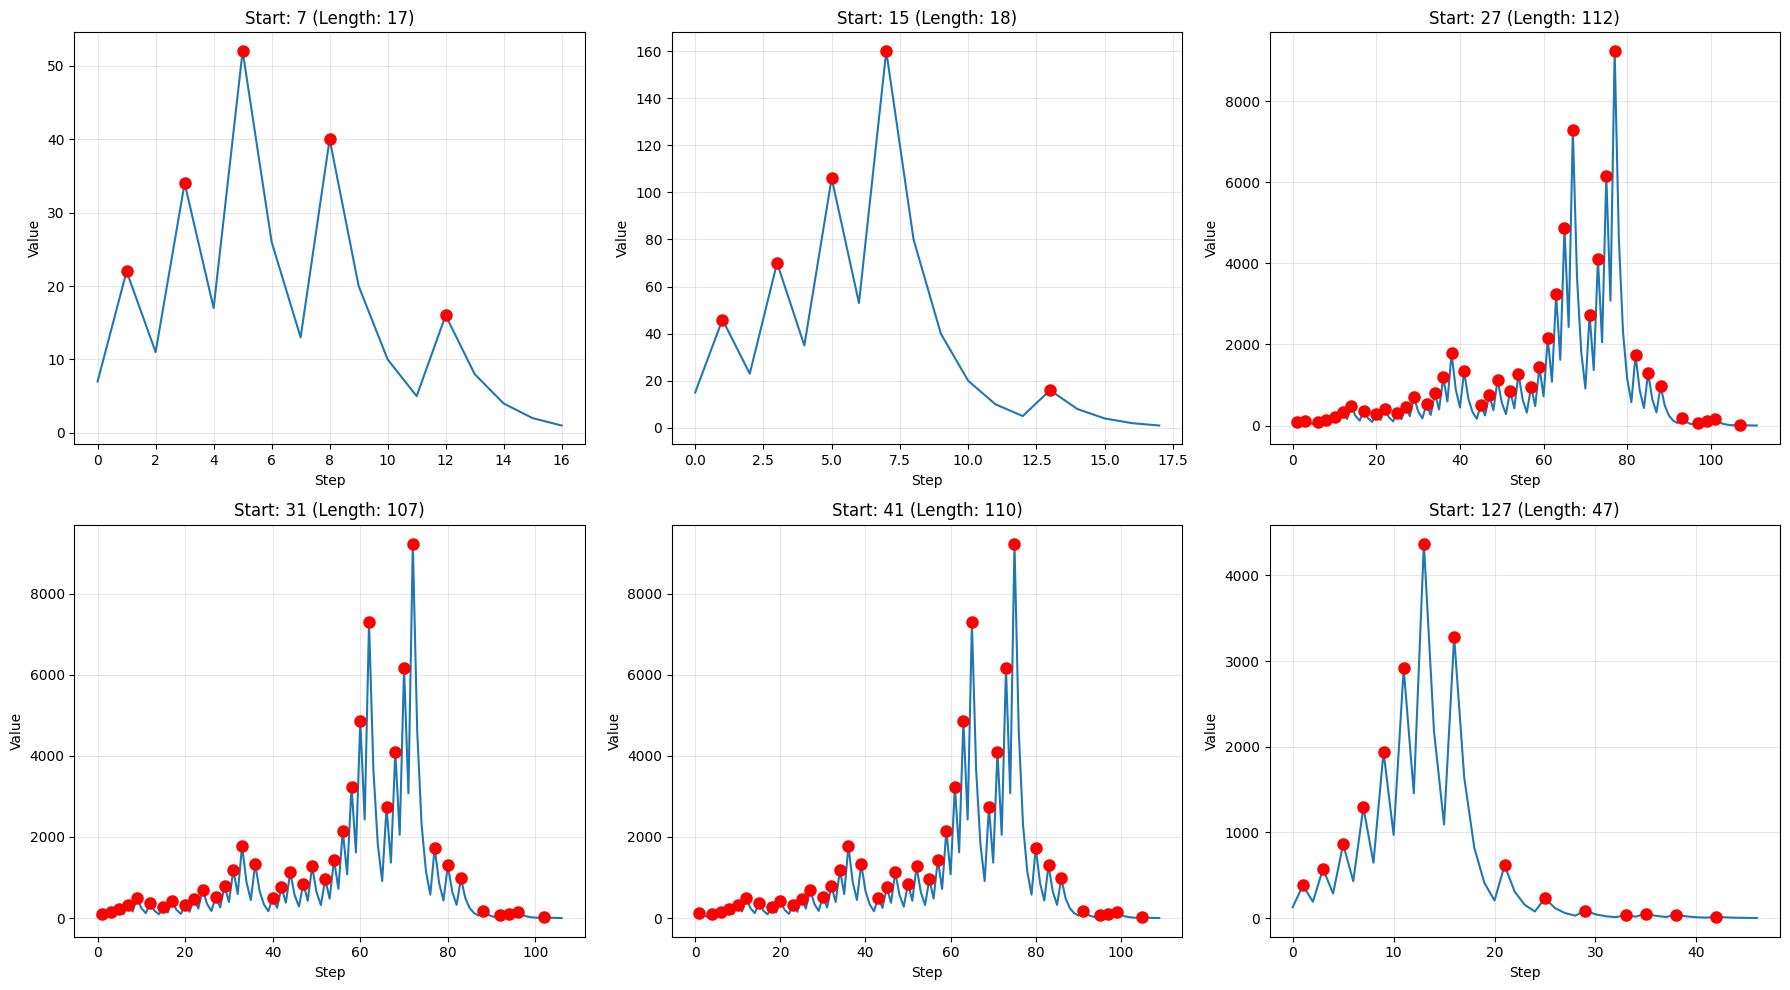

In [25]:
# Reload the visualization module to get latest changes
import importlib
import math_research.analysis.visualization
importlib.reload(math_research.analysis.visualization)
from math_research.analysis.visualization import SequenceVisualizer

# Create visualizations for multiple sequences
visualizer = SequenceVisualizer()

# Plot individual sequences
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, data in enumerate(sequences_data[:6]):  # Plot first 6
    ax = axes[idx]
    visualizer.plot_sequence(
        data['sequence'],
        ax=ax,
        title=f"Start: {data['start']} (Length: {data['length']})",
        show_peaks=True
    )

plt.tight_layout()
plt.show()


## Log Scale Visualization


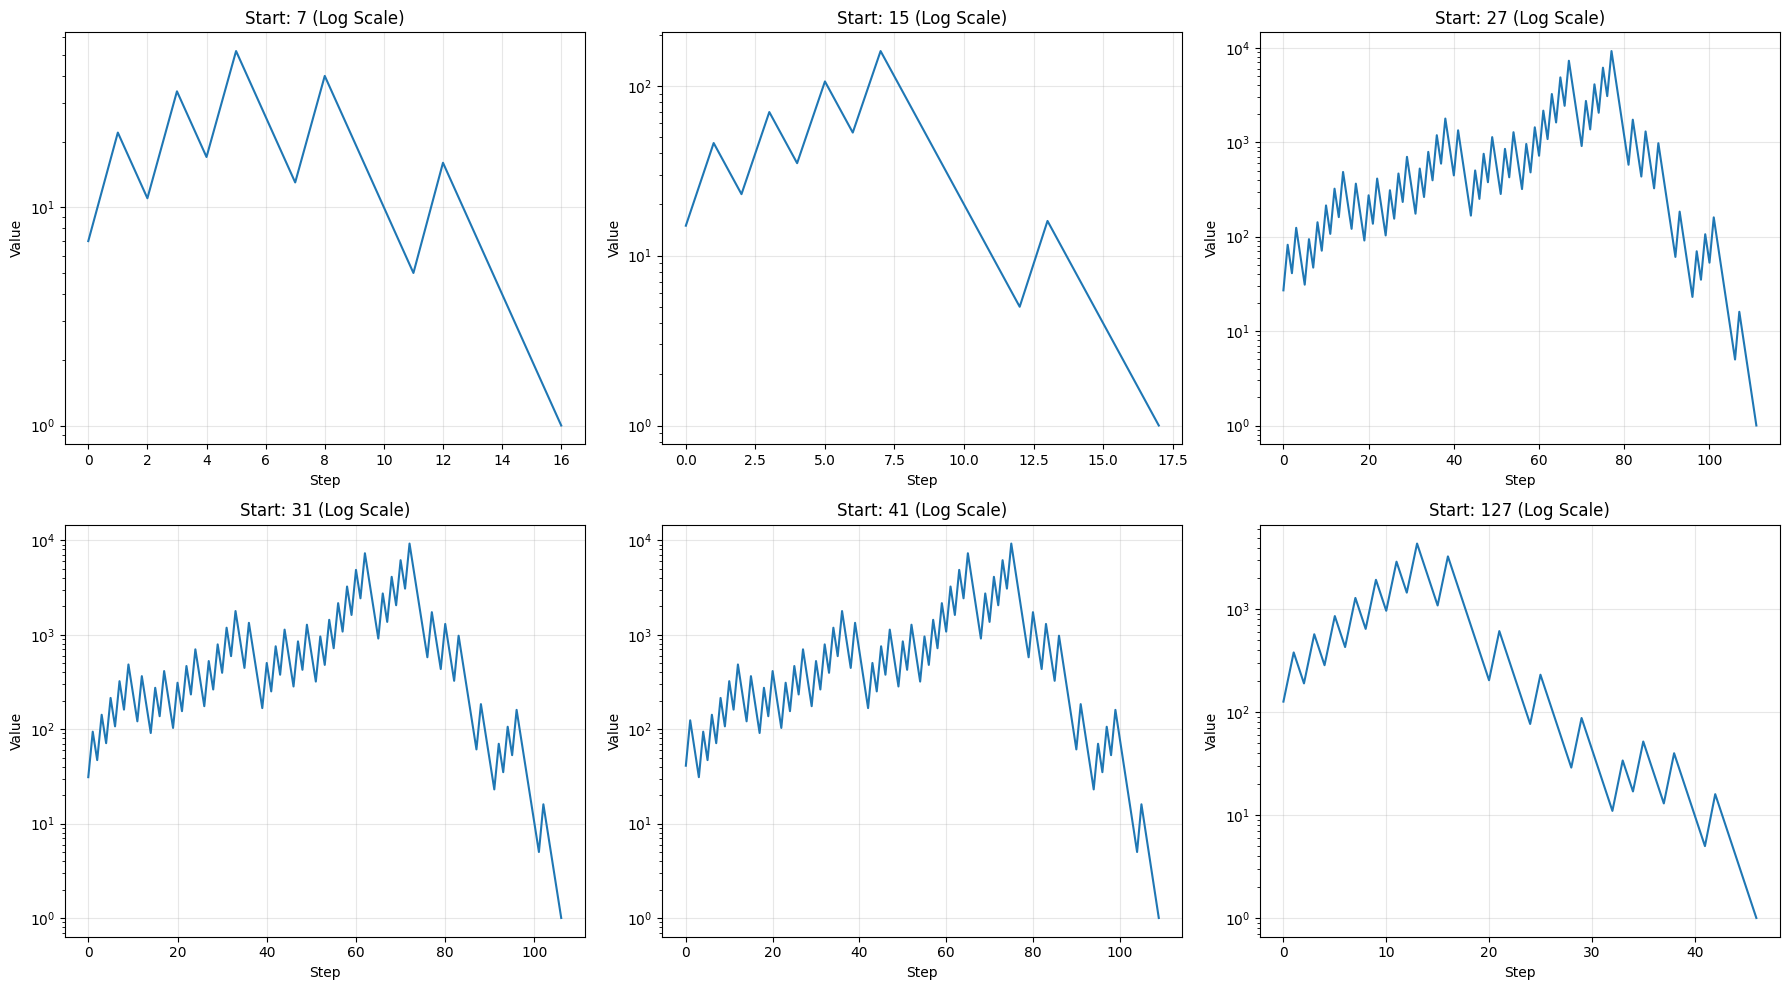

In [26]:
# Plot sequences on log scale to better see patterns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, data in enumerate(sequences_data[:6]):
    ax = axes[idx]
    visualizer.plot_log_sequence(
        data['sequence'],
        ax=ax,
        title=f"Start: {data['start']} (Log Scale)"
    )

plt.tight_layout()
plt.show()


## Histogram Analysis


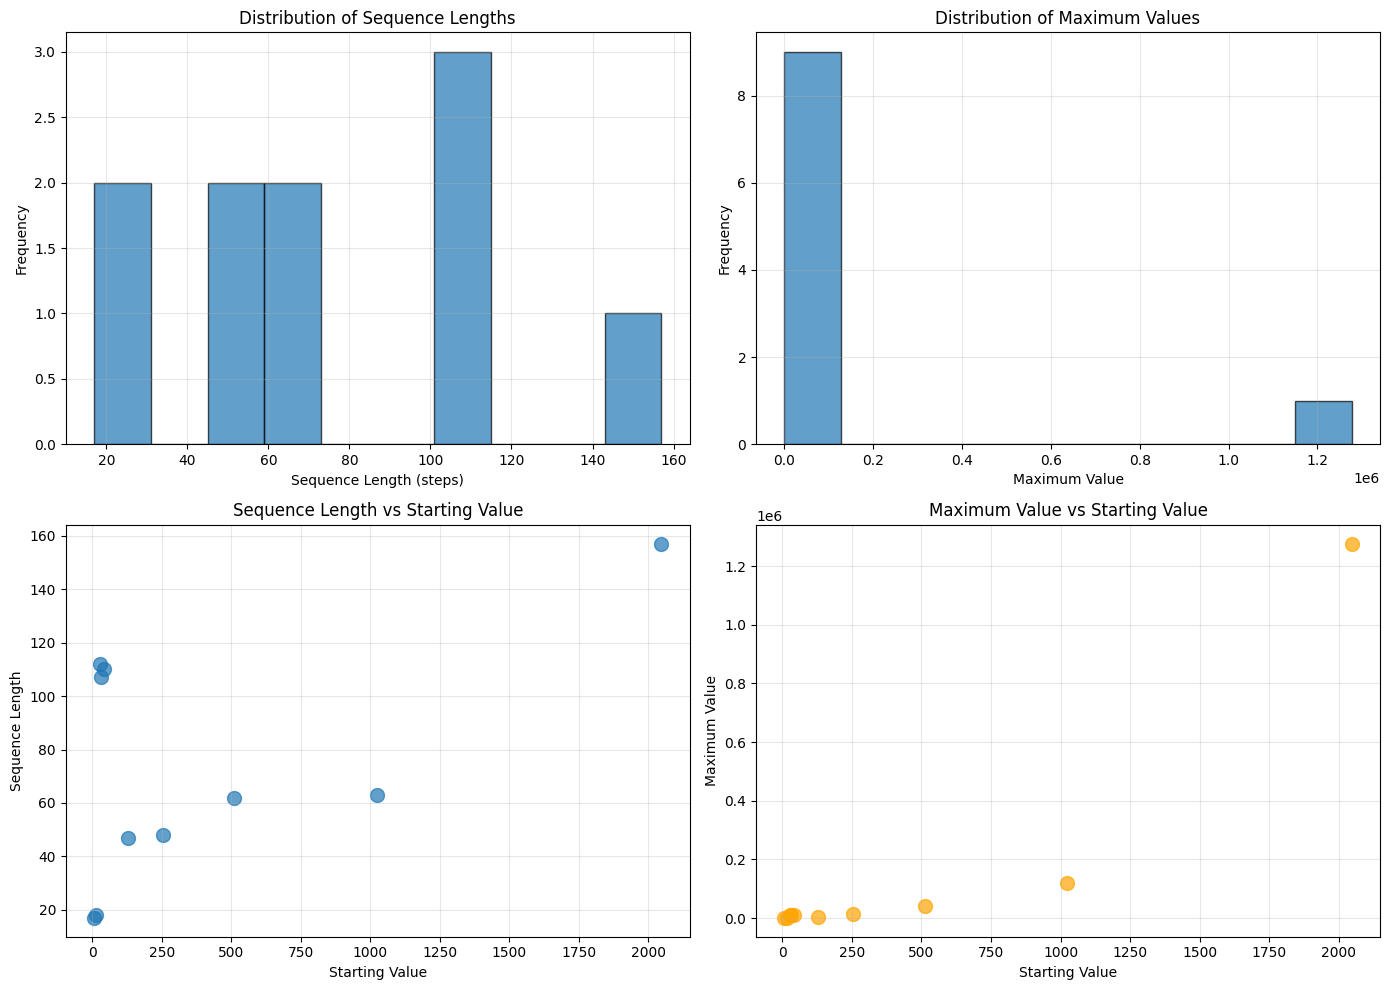

In [27]:
# Analyze value distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Sequence lengths histogram
lengths = [d['length'] for d in sequences_data]
axes[0, 0].hist(lengths, bins=10, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Sequence Length (steps)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Sequence Lengths')
axes[0, 0].grid(True, alpha=0.3)

# Max values histogram
max_values = [d['max_value'] for d in sequences_data]
axes[0, 1].hist(max_values, bins=10, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Maximum Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Maximum Values')
axes[0, 1].grid(True, alpha=0.3)

# Length vs Starting Value
starts = [d['start'] for d in sequences_data]
axes[1, 0].scatter(starts, lengths, alpha=0.7, s=100)
axes[1, 0].set_xlabel('Starting Value')
axes[1, 0].set_ylabel('Sequence Length')
axes[1, 0].set_title('Sequence Length vs Starting Value')
axes[1, 0].grid(True, alpha=0.3)

# Max Value vs Starting Value
axes[1, 1].scatter(starts, max_values, alpha=0.7, s=100, color='orange')
axes[1, 1].set_xlabel('Starting Value')
axes[1, 1].set_ylabel('Maximum Value')
axes[1, 1].set_title('Maximum Value vs Starting Value')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Pattern Analysis - Long Steps


In [28]:
# Analyze long step patterns
print("Long Step Analysis:\n")
print("=" * 80)

for data in sequences_data[:5]:  # Analyze first 5
    seq = CollatzSequence(start=data['start'])
    
    # Get long step information
    long_step_info = seq.compute_long_step(data['start'])
    print(f"\nStarting value: {data['start']}")
    print(f"  k (exponent): {long_step_info.get('k', 'N/A')}")
    print(f"  k' (exponent): {long_step_info.get('k_prime', 'N/A')}")
    print(f"  Result: {long_step_info.get('result', 'N/A')}")
    print(f"  Steps skipped: {long_step_info.get('steps_skipped', 'N/A')}")


Long Step Analysis:


Starting value: 7
  k (exponent): 3
  k' (exponent): 1
  Result: 13
  Steps skipped: N/A

Starting value: 15
  k (exponent): 4
  k' (exponent): 4
  Result: 5
  Steps skipped: N/A

Starting value: 27
  k (exponent): 2
  k' (exponent): 1
  Result: 31
  Steps skipped: N/A

Starting value: 31
  k (exponent): 5
  k' (exponent): 1
  Result: 121
  Steps skipped: N/A

Starting value: 41
  k (exponent): 1
  k' (exponent): 1
  Result: 31
  Steps skipped: N/A


## Comparison: Regular vs Long Step Sequences


Comparison for starting value: 27

Regular sequence length: 112 steps
Long steps sequence length: 18 key points
Number of long steps: 17
Steps saved: 94 (simplified representation)


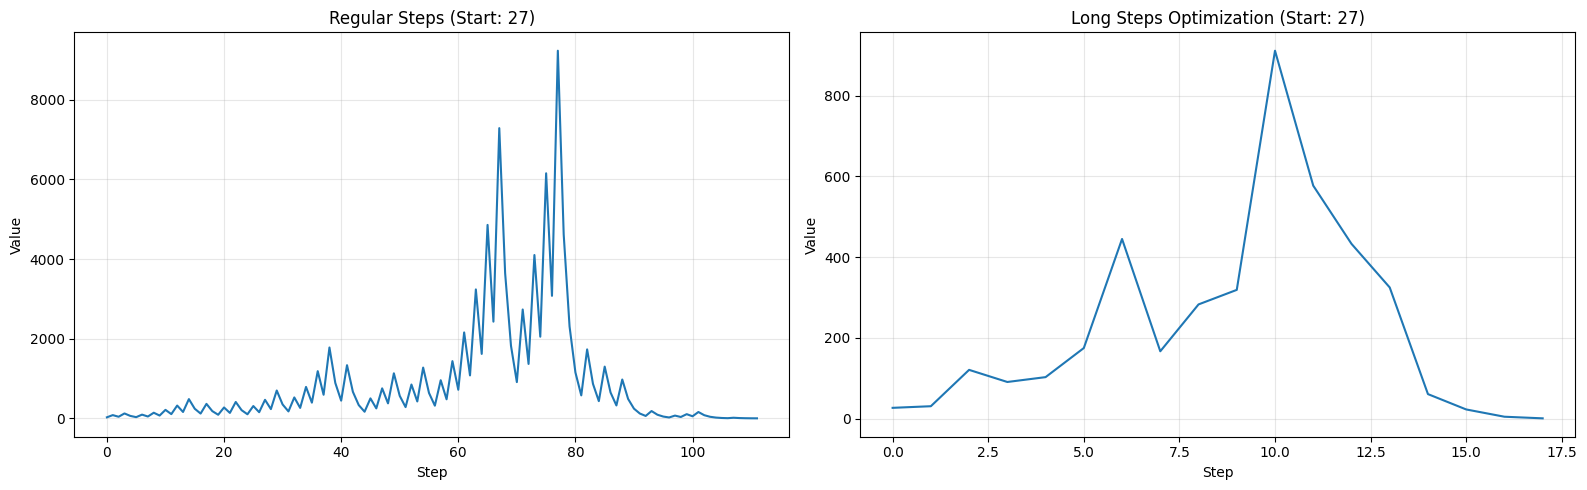

In [31]:
# Compare regular sequence generation with long step optimization
test_value = 27

seq = CollatzSequence(start=test_value)

# Regular sequence
regular_sequence = seq.generate()

# Sequence with long steps (returns list of dictionaries)
long_steps_info = seq.generate_with_long_steps()

# Extract the sequence values from long steps (show the 'result' of each step)
# Include the starting value and all intermediate results
long_steps_sequence = [test_value]  # Start with initial value
for step in long_steps_info:
    long_steps_sequence.append(step['result'])

print(f"Comparison for starting value: {test_value}\n")
print("=" * 60)
print(f"Regular sequence length: {len(regular_sequence)} steps")
print(f"Long steps sequence length: {len(long_steps_sequence)} key points")
print(f"Number of long steps: {len(long_steps_info)}")
print(f"Steps saved: {len(regular_sequence) - len(long_steps_sequence)} (simplified representation)")

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

visualizer.plot_sequence(regular_sequence, ax=ax1, title=f"Regular Steps (Start: {test_value})")
visualizer.plot_sequence(long_steps_sequence, ax=ax2, title=f"Long Steps Optimization (Start: {test_value})")

plt.tight_layout()
plt.show()


## Summary Statistics


In [32]:
# Overall summary statistics
print("Overall Summary Statistics:\n")
print("=" * 60)

all_lengths = [d['length'] for d in sequences_data]
all_max_values = [d['max_value'] for d in sequences_data]
all_starts = [d['start'] for d in sequences_data]

print(f"Number of sequences analyzed: {len(sequences_data)}")
print(f"\nSequence Lengths:")
print(f"  Mean: {np.mean(all_lengths):.2f}")
print(f"  Median: {np.median(all_lengths):.2f}")
print(f"  Min: {min(all_lengths)}")
print(f"  Max: {max(all_lengths)}")
print(f"  Std Dev: {np.std(all_lengths):.2f}")

print(f"\nMaximum Values:")
print(f"  Mean: {np.mean(all_max_values):.2f}")
print(f"  Median: {np.median(all_max_values):.2f}")
print(f"  Min: {min(all_max_values)}")
print(f"  Max: {max(all_max_values)}")
print(f"  Std Dev: {np.std(all_max_values):.2f}")

print(f"\nStarting Values:")
print(f"  Range: {min(all_starts)} to {max(all_starts)}")
print(f"  Mean: {np.mean(all_starts):.2f}")


Overall Summary Statistics:

Number of sequences analyzed: 10

Sequence Lengths:
  Mean: 74.10
  Median: 62.50
  Min: 17
  Max: 157
  Std Dev: 43.33

Maximum Values:
  Mean: 147979.60
  Median: 9232.00
  Min: 52
  Max: 1276936
  Std Dev: 377826.56

Starting Values:
  Range: 7 to 2047
  Mean: 408.40


## Notes

This notebook demonstrates:
- **Statistical Analysis**: Using `SequenceStatistics` to analyze sequence properties
- **Visualization**: Creating various plots with `SequenceVisualizer`
- **Pattern Detection**: Analyzing long step patterns and optimization
- **Comparative Analysis**: Comparing different sequence generation methods

You can modify the `starting_values` list to analyze different sequences and explore patterns.
